<a href="https://colab.research.google.com/github/SailokeshParidala/OIBSIP/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task5: Sales Prediction Model
submitted by Sailokesh Paridala

In [1]:
#importing all necessary libraries required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Collecting data

In [2]:
df=pd.read_csv("/content/Advertising.csv")

# Analyzing Data
understanding the data

In [3]:
#columns in  data
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
#dimensions of the data
print("Rows and Columns in dataset",df.shape)
print("Size of the data",df.size)

Rows and Columns in dataset (200, 5)
Size of the data 1000


In [7]:
#data types in dataset
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data PreProcessing
1.cleaning

In [9]:
#removing null items
df.isnull().sum()
#no null items to remove

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
df.drop(columns=["Unnamed: 0"],inplace =True)

In [14]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


2. Transforming data

In [18]:
df=round(df[['TV',	'Radio',	'Newspaper',	'Sales']])

In [19]:
df

,TV,Radio,Newspaper,Sales
0,230.0,38.0,69.0,22.0
1,44.0,39.0,45.0,10.0
2,17.0,46.0,69.0,9.0
3,152.0,41.0,58.0,18.0
4,181.0,11.0,58.0,13.0
...,...,...,...,...
195,38.0,4.0,14.0,8.0
196,94.0,5.0,8.0,10.0
197,177.0,9.0,6.0,13.0
198,284.0,42.0,66.0,26.0


In [22]:
#finding duplicates
df[df.duplicated()].sum()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

# Exploratory Data Analysis

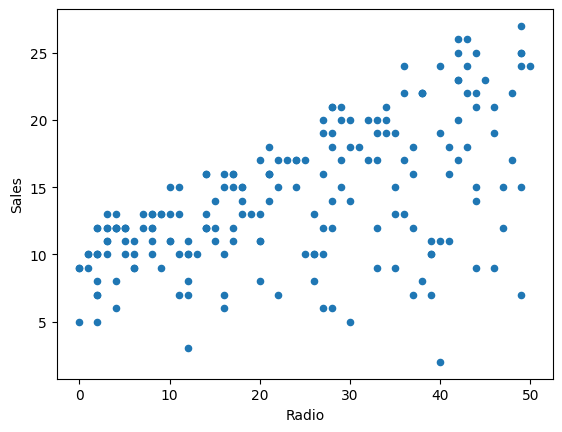

In [27]:
df.plot(kind='scatter',x="Radio",y="Sales")
plt.show()

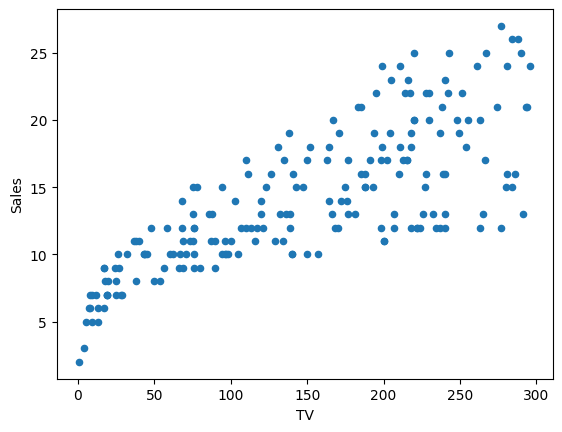

In [26]:
df.plot(kind='scatter',x='TV',y='Sales')
plt.show()

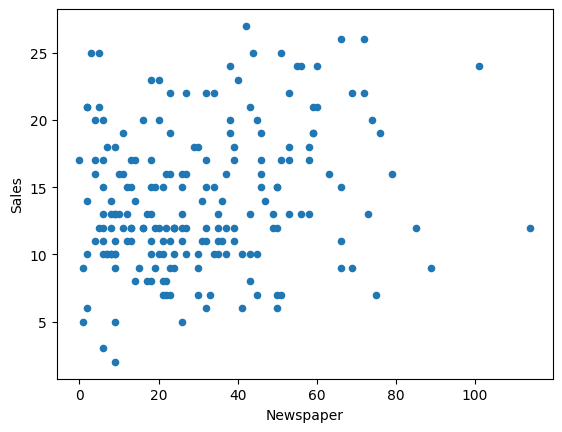

In [29]:
df.plot(kind='scatter',x='Newspaper',y='Sales')
plt.show()

# Model
1.train_test data

In [30]:
#splitting train&testdata
from sklearn.model_selection import train_test_split

In [42]:
x=df.iloc[:,0:-1]
print(x)

        TV  Radio  Newspaper
0    230.0   38.0       69.0
1     44.0   39.0       45.0
2     17.0   46.0       69.0
3    152.0   41.0       58.0
4    181.0   11.0       58.0
..     ...    ...        ...
195   38.0    4.0       14.0
196   94.0    5.0        8.0
197  177.0    9.0        6.0
198  284.0   42.0       66.0
199  232.0    9.0        9.0

[200 rows x 3 columns]


In [37]:
y=df.iloc[:,1]
print(y)

0      38.0
1      39.0
2      46.0
3      41.0
4      11.0
       ... 
195     4.0
196     5.0
197     9.0
198    42.0
199     9.0
Name: Radio, Length: 200, dtype: float64


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression 

2.Model Training

In [64]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

In [65]:
lr=LinearRegression()

lr.fit(x_train_scaled, y_train)

LinearRegression()

In [66]:
y_pred=lr.predict(x_test_scaled)


3.R2_score

In [67]:
from sklearn.metrics import r2_score,mean_squared_error


In [73]:
r=r2_score(y_test,y_pred)
print("Accuracy % =",r*100,"%")

Accuracy % = 98.4431074273983 %


In [69]:
mean_squared_error(y_test,y_pred)

3.45723564671932

# Thank You